In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from IPython import display
import time as t
%matplotlib inline
import torch
import torch.functional as nn
import torch.optim
import numpy as np

env = gym.make('CartPole-v1')

/Users/adithyashanker/anaconda3/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [17]:
episodes = 2000
observations = []
rewards = []


for episode in range(episodes) :
    initial_state = env.reset()
    ended = False
    rewardsum = 0
    while not ended :
        action = env.action_space.sample()
        obs, reward, ended, info = env.step(action)
        #print(env.observation_space)
        observations.append(obs)
        rewardsum += reward
        #print(rewardsum)

velocities = []
ang_velocities = []
for observation in observations :
    velocities.append(observation[1])
    ang_velocities.append(observation[3])

print (f'min velocity : {np.min(velocities)}, max velocity : {np.max(velocities)}\n')
print (f'min ang_velocity : {np.min(ang_velocities)}, max ang_velocity : {np.max(ang_velocities)}')
      
    



min velocity : -2.9308483600616455, max velocity : 3.043727159500122

min ang_velocity : -2.9538748264312744, max ang_velocity : 3.490354299545288


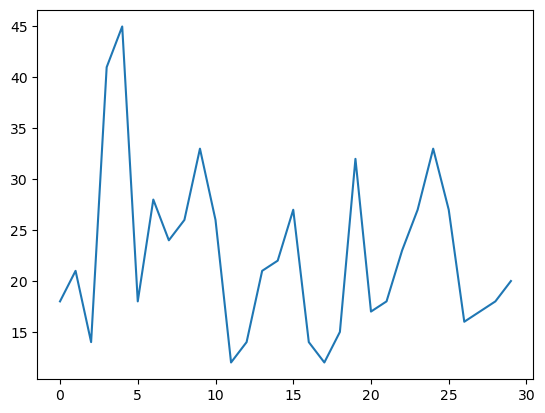

In [5]:
plt.plot(range(len(rewards)), rewards)

In [118]:
def mapStateSpace(obs):

    max_position = 2.4  # Example max range for position
    max_velocity = 5    # Example max range for velocity
    max_angle = np.pi   # Full possible range for angle in radians
    max_angular_velocity = 4  # Example max range for angular velocity

    # Normalize and discretize each dimension
    a = np.round((obs[0] / max_position) * 10)  # Discretize position into 10 bins
    b = np.round((obs[1] / max_velocity) * 15)  # Discretize velocity into 10 bins
    c = np.round((obs[2] / max_angle) * 36)     # Discretize angle into 18 bins (~20 degrees each)
    d = np.round((obs[3] / max_angular_velocity) * 15)  # Discretize angular velocity into 10 bins

    # Compute state index with adjusted weights if needed
    return int(10*a + 10*b + 30*c + 10*d)
   
    

In [119]:

n_states = 4000  
n_actions = 2

Q_table = np.zeros((n_states, n_actions))

learning_rate = 0.1
discount_factor = 1
exploration_prob = 0.2
epochs = 1000

for epoch in range(epochs):

    current_state = env.reset()
    #env.render()
    ended = False
    rewardsum = 0


    while not ended :

        if np.random.rand() < exploration_prob:
            action = env.action_space.sample()  
        else:
            action = np.argmax(Q_table[mapStateSpace(current_state)])  
        
        next_state, reward, ended, info = env.step(action)

        next_max = np.max(Q_table[mapStateSpace(next_state)])
        td_target = reward + discount_factor * next_max
        td_error = td_target - Q_table[mapStateSpace(current_state), action]
        Q_table[mapStateSpace(current_state), action] += learning_rate * td_error
        rewardsum += reward

        current_state = next_state 
    print(rewardsum)
    

print("Learned Q-table:")

    







10.0
9.0
9.0
11.0
9.0
12.0
13.0
10.0
13.0
9.0
10.0
9.0
11.0
11.0
11.0
10.0
9.0
9.0
10.0
11.0
9.0
10.0
9.0
12.0
10.0
13.0
9.0
13.0
10.0
9.0
10.0
10.0
15.0
10.0
9.0
10.0
10.0
9.0
10.0
8.0
9.0
11.0
9.0
9.0
10.0
10.0
11.0
12.0
15.0
9.0
10.0
9.0
10.0
13.0
10.0
9.0
11.0
10.0
16.0
11.0
14.0
13.0
9.0
8.0
9.0
9.0
10.0
10.0
9.0
9.0
12.0
12.0
11.0
12.0
11.0
20.0
12.0
11.0
12.0
26.0
14.0
10.0
12.0
22.0
18.0
43.0
26.0
62.0
26.0
21.0
10.0
12.0
14.0
18.0
12.0
38.0
15.0
12.0
28.0
12.0
14.0
19.0
43.0
12.0
47.0
38.0
8.0
17.0
22.0
15.0
10.0
10.0
12.0
22.0
12.0
17.0
10.0
10.0
21.0
10.0
20.0
15.0
12.0
10.0
12.0
22.0
19.0
9.0
10.0
10.0
9.0
9.0
14.0
16.0
12.0
14.0
15.0
19.0
24.0
10.0
14.0
17.0
10.0
18.0
10.0
20.0
21.0
17.0
20.0
12.0
16.0
63.0
19.0
14.0
12.0
10.0
18.0
16.0
43.0
15.0
17.0
19.0
20.0
18.0
17.0
18.0
22.0
11.0
46.0
12.0
13.0
25.0
12.0
13.0
20.0
17.0
20.0
28.0
25.0
23.0
15.0
20.0
17.0
17.0
25.0
16.0
15.0
11.0
22.0
25.0
20.0
11.0
18.0
15.0
20.0
14.0
16.0
25.0
18.0
13.0
19.0
20.0
45.0
23.0
13.0
13.0


In [115]:
print(Q_table)

[[409.88254028 405.6717337 ]
 [  0.           0.        ]
 [  0.           0.        ]
 ...
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]]


In [120]:
episodes = 2000
observations = []
rewards = []


for episode in range(episodes) :
    state = env.reset()
    ended = False
    rewardsum = 0
    while not ended :
        env.render()
        action = np.argmax(Q_table[mapStateSpace(state)])
        state, reward, ended, info = env.step(action)
        rewardsum += reward
    print(rewardsum)
    t.sleep(1)
    rewards.append(rewardsum)

print(np.max(rewards))

500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
